# Upper Confidence Bound (UCB)

What were going to do here is given a dataset of 10 ads and binary variables if an arm was interacted with.

We want to try and identify the best add using reinforcement learning

were going to perform this on a contructed Df that simulates the users clicking on ads

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv("Data/Ads_CTR_Optimisation.csv")
display(dataset.head(), dataset.shape)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


(10000, 10)

## Implementing UCB

In [39]:
import math

#set up the lenths of the dataset so it can loop it
N = dataset.shape[0]
d = dataset.shape[1]

# initilising lists that will be used
ads_selected = []
numbers_of_selections = [0]*d
sums_of_rewards = [0]*d
total_reward = 0

for n in range(0, N):
    #start with Ad 0
    ad = 0
    
    # initilise max uppper bound
    max_upper_bound = 0
    
    for i in range(0, d):
        # adjustuing the ub for ads taht have been chosen already
        if (numbers_of_selections[i] > 0):
            # calculate r_i the average reqard of ad i up to this round
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            
            # calculate the delta change for computation of the confidence interval
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            
            # we only care about the uppber bound so lets make it
            upper_bound = average_reward + delta_i
        # setting first upper bound for each add
        else:
            upper_bound = 1e400
            
        # now we select the next ad based on it having the highest click rate
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
            
    # adding the information like how many times it was chosed and adjusting reqards for next observation
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

In [40]:
ads_selected[0:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [41]:
numbers_of_selections

[705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]

In [42]:
sums_of_rewards

[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]

In [43]:
total_reward

2178

## Visualising the results

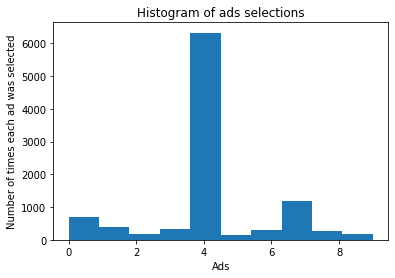

In [44]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections by RL')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

## Lets compare this to the amount of times each add was selected

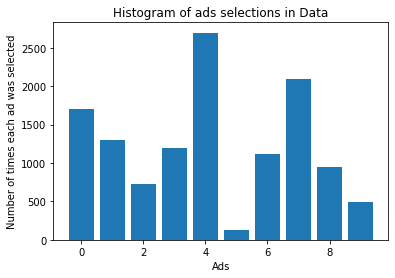

In [49]:
plt.bar(range(0, 10), dataset.sum(axis=0).values)
plt.title('Histogram of ads selections in Data')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

We can see here thet the most clicked add was indeed add 4 wivch Rl identified very strongly

## Finally lets see if it can find wich one is better faster that the full data

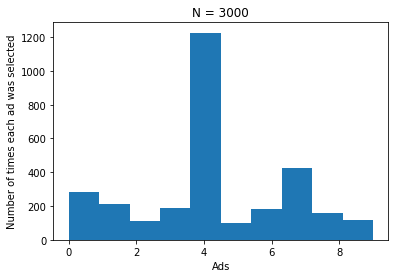

In [52]:
import math

#set up the lenths of the dataset so it can loop it
N = 3000
d = dataset.shape[1]

# initilising lists that will be used
ads_selected = []
numbers_of_selections = [0]*d
sums_of_rewards = [0]*d
total_reward = 0

for n in range(0, N):
    #start with Ad 0
    ad = 0
    
    # initilise max uppper bound
    max_upper_bound = 0
    
    for i in range(0, d):
        # adjustuing the ub for ads taht have been chosen already
        if (numbers_of_selections[i] > 0):
            # calculate r_i the average reqard of ad i up to this round
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            
            # calculate the delta change for computation of the confidence interval
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            
            # we only care about the uppber bound so lets make it
            upper_bound = average_reward + delta_i
        # setting first upper bound for each add
        else:
            upper_bound = 1e400
            
        # now we select the next ad based on it having the highest click rate
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
            
    # adding the information like how many times it was chosed and adjusting reqards for next observation
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward
    
plt.hist(ads_selected)
plt.title('N = 3000')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

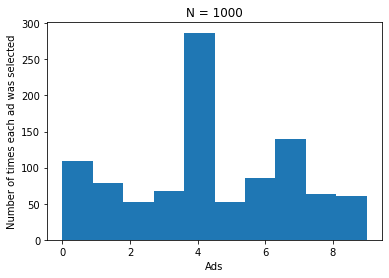

In [53]:
import math

#set up the lenths of the dataset so it can loop it
N = 1000
d = dataset.shape[1]

# initilising lists that will be used
ads_selected = []
numbers_of_selections = [0]*d
sums_of_rewards = [0]*d
total_reward = 0

for n in range(0, N):
    #start with Ad 0
    ad = 0
    
    # initilise max uppper bound
    max_upper_bound = 0
    
    for i in range(0, d):
        # adjustuing the ub for ads taht have been chosen already
        if (numbers_of_selections[i] > 0):
            # calculate r_i the average reqard of ad i up to this round
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            
            # calculate the delta change for computation of the confidence interval
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            
            # we only care about the uppber bound so lets make it
            upper_bound = average_reward + delta_i
        # setting first upper bound for each add
        else:
            upper_bound = 1e400
            
        # now we select the next ad based on it having the highest click rate
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
            
    # adding the information like how many times it was chosed and adjusting reqards for next observation
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward
    
plt.hist(ads_selected)
plt.title('N = 1000')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

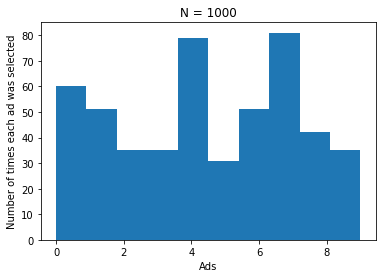

In [54]:
import math

#set up the lenths of the dataset so it can loop it
N = 500
d = dataset.shape[1]

# initilising lists that will be used
ads_selected = []
numbers_of_selections = [0]*d
sums_of_rewards = [0]*d
total_reward = 0

for n in range(0, N):
    #start with Ad 0
    ad = 0
    
    # initilise max uppper bound
    max_upper_bound = 0
    
    for i in range(0, d):
        # adjustuing the ub for ads taht have been chosen already
        if (numbers_of_selections[i] > 0):
            # calculate r_i the average reqard of ad i up to this round
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            
            # calculate the delta change for computation of the confidence interval
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            
            # we only care about the uppber bound so lets make it
            upper_bound = average_reward + delta_i
        # setting first upper bound for each add
        else:
            upper_bound = 1e400
            
        # now we select the next ad based on it having the highest click rate
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
            
    # adding the information like how many times it was chosed and adjusting reqards for next observation
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward
    
plt.hist(ads_selected)
plt.title('N = 1000')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

We can see that it very quickly can identify the best add in the group, as fast as after 1000 iterations, even when the amount of clicks this add has gotten wasnt even the best add by a large margin.

This makes me quite happy with using Reinforcement learning for choosing the best add